In [98]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score
%matplotlib inline 



In [87]:
data = pd.read_csv('../users_v2.csv')

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37933 entries, 0 to 37932
Data columns (total 20 columns):
user_id                      37933 non-null int64
topic_mode                   37933 non-null int64
suggested                    37933 non-null int64
review_mode                  37933 non-null int64
time_taken                   37933 non-null int64
correct                      37933 non-null int64
count_attempts               37933 non-null int64
hint_used                    37933 non-null int64
count_hints                  37933 non-null int64
earned_proficiency           37933 non-null int64
points_earned                37933 non-null int64
more_than_ten_activities     37933 non-null int64
more_than_100_activities     37933 non-null int64
more_than_1000_activities    37933 non-null int64
active_more_than_1_day       37933 non-null int64
active_at_least_5_days       37933 non-null int64
active_at_least_10_days      37933 non-null int64
active_from_last             37933 non-nu

In [89]:
y = data['target'].values


796

In [90]:
X = data.iloc[:,:-1].values

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [78]:
X_test, y_test

(array([[192285,      0,      0, ...,      0,      0,      4],
        [114632,     41,     11, ...,      0,      0,      2],
        [227218,      1,     11, ...,      1,      0,     40],
        ...,
        [  9469,    301,     55, ...,      1,      1,     14],
        [ 24287,     30,     15, ...,      1,      1,     44],
        [144441,    144,     51, ...,      1,      1,      1]]),
 array([0, 0, 0, ..., 0, 0, 0]))

In [103]:
model = LogisticRegression(solver='lbfgs')

In [104]:
model.fit(X_train,y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [105]:
y_hat = model.predict(X_test)

In [106]:
model.score(X_test,y_test)

0.9307254323070434

In [107]:
precision_score(y_test, y_hat)

0.5459770114942529

In [108]:
recall_score(y_test, y_hat)

0.1411589895988113

In [23]:
(model.predict_proba(X_test), y_test)

(array([[0.94804758, 0.05195242],
        [0.96990333, 0.03009667],
        [0.56062564, 0.43937436],
        ...,
        [0.84901751, 0.15098249],
        [0.94334748, 0.05665252],
        [0.99170972, 0.00829028]]), array([0, 0, 0, ..., 0, 0, 0]))

In [85]:
np.exp(model.coef_)

array([[0.99999361, 0.9995542 , 1.00829006, 1.00464017, 1.00000577,
        1.00048527, 1.00062725, 1.0005135 , 0.99990348, 0.99913026,
        0.99997423, 0.99929   , 1.0002199 , 0.99999831, 1.00015243,
        1.00020049, 1.00022297, 0.88384574]])

In [15]:
def standard_confusion_matrix(y_true, y_predict):
    y_true = np.array(y_true)
    y_predict = np.array(y_predict)

    tp = np.sum((y_true == y_predict) & (y_predict==1))
    fp = np.sum((y_true != y_predict) & (y_predict==1))
    fn = np.sum((y_true != y_predict) & (y_predict==0))
    tn = np.sum((y_true == y_predict) & (y_predict==0))
   
    return np.array([[tp, fp], [fn, tn]])

In [72]:
standard_confusion_matrix(y_test, y_hat)

array([[  96,   68],
       [ 562, 8758]])

In [17]:
def roc_curve_(probabilities, labels):
    '''
    INPUT: numpy array, numpy array
    OUTPUT: list, list, list

    Take a numpy array of the predicted probabilities and a numpy array of the
    true labels.
    Return the True Positive Rates, False Positive Rates and Thresholds for the
    ROC curve.
    '''
    sorted = np.sort(probabilities)
    threshold = list(sorted)
    true_pos = labels.sum()
    true_neg =  len(labels)-true_pos
    
    TPR =[]
    FPR = []
    for vals in threshold:        
        pos = np.sum((vals <= probabilities) & (labels==True))
        f_pos = np.sum((vals <= probabilities) & (labels==False))

        TPR.append(pos/true_pos)
        FPR.append(f_pos/true_neg)
    return TPR, FPR, threshold

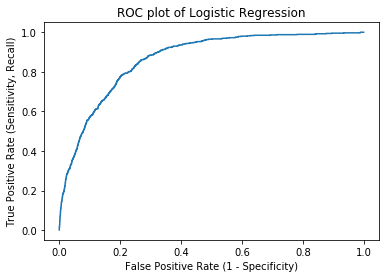

In [86]:
probabilities = model.predict_proba(X_test)[:, 1]

tpr, fpr, thresholds = roc_curve_(probabilities, y_test)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity, Recall)")
plt.title("ROC plot of Logistic Regression")
plt.show()
